# Machine Learning con Spark (MLlib) en Databricks

### Spark

La abstracción central y los inicios de Apache Spark son los conjuntos de datos distribuidos resistentes (**RDD**).

Un RDD es una colección de elementos tolerantes a fallas que se pueden operar en paralelo. Puede crearlos paralelizando una colección existente en su programa de controladores, o haciendo referencia a un conjunto de datos en un sistema de almacenamiento externo, como un sistema de archivos compartido, HDFS, HBase o cualquier fuente de datos que ofrezca un formato de entrada Hadoop.

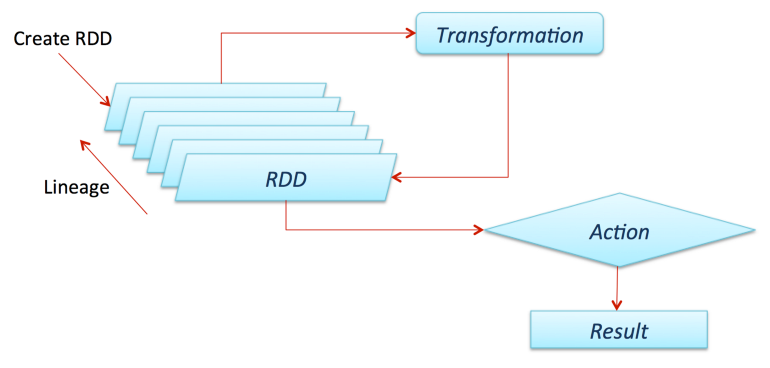

*Fuente*:*https://towardsdatascience.com/your-first-apache-spark-ml-model-d2bb82b599dd*

Algo muy importante que debe saber sobre Spark es que todas las transformaciones son perezosas(**lazy**), lo que significa que no calculan sus resultados de inmediato. En cambio, Spark recuerda las transformaciones aplicadas a algún conjunto de datos base (por ejemplo, un archivo). Las transformaciones solo se calculan cuando una acción requiere que se devuelva un resultado al programa controlador.

Un **DataFrame** es un conjunto de datos organizado en columnas con nombre. Es conceptualmente equivalente a una tabla en una base de datos relacional o un DataFrame en R / Python, pero con optimizaciones para maximizar la velocidad y rendimiento.El catalizador es el que optimiza el proceso



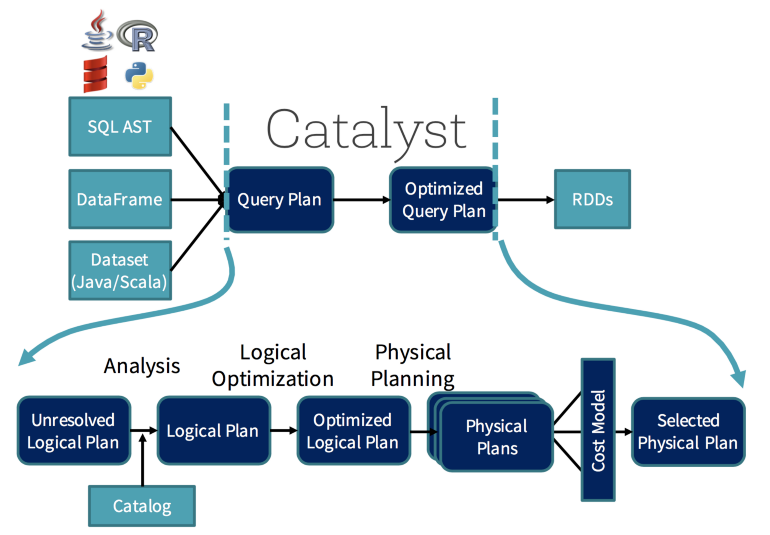

Los DataFrames se pueden construir a partir de una **amplia variedad de fuentes** , como archivos de datos estructurados, tablas en Hive, bases de datos externas o RDD existentes.

### Conceptos básicos de ML y Databricks

**DataFrame:** esta API ML utiliza DataFrame de Spark SQL como un conjunto de datos ML, que puede contener una variedad de tipos de datos. Por ejemplo, un DataFrame podría tener diferentes columnas que almacenan texto, vectores de características, etiquetas y predicciones.

**Transformer:** Un Transformer es un algoritmo que puede transformar un DataFrame en otro DataFrame. Por ejemplo, un modelo ML es un Transformer que transforma un DataFrame con características en un DataFrame con predicciones.

**Estimator:** un estimador es un algoritmo que se puede ajustar a un DataFrame para producir un transformador. Por ejemplo, un algoritmo de aprendizaje es un estimador que se entrena en un DataFrame y produce un modelo

**Pipeline:** un pipeline encadena varios transformadores y estimadores para especificar un flujo de trabajo de AA

**Parámetro:** todos los transformadores y estimadores ahora comparten una API común para especificar parámetros.

### Fases habituales del modelo de Machine Learning


La mayoría de proyectos de Data Science y generación de modelos de inteligencia artificial contienen unas fases comunes:
1. Importanción y limpieza de datos: se cargan los datos, normalmente en formato de DataFrame y se pre-procesan (eliminación de valores nulos, normalización, ingenieria de variables, etc)
2. División de datos de entrenamiento y de test
3. Entrenamiento y optimiazación del modelo 
4. Evaluación y despliegue del modelo



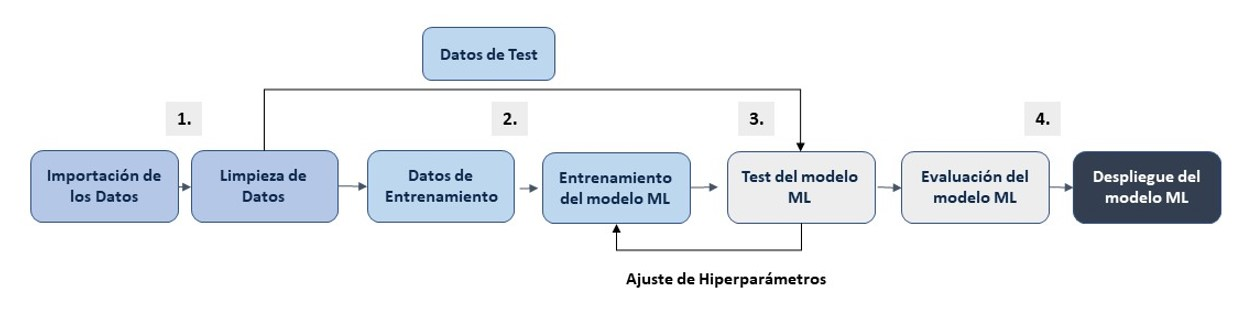

#### Fase 1. Importación de datos en Spark

Fuente: FavioVazquez https://github.com/FavioVazquez/first_spark_model

In [37]:
import findspark
findspark.init()
import pandas as pd
import pyspark

In [38]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('Titanic Data') \
    .getOrCreate()

In [39]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("train.csv"))

In [40]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [41]:
df.toPandas().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S


In [42]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [43]:
df.count()

891

In [44]:
df.dtypes

[('PassengerId', 'string'),
 ('Survived', 'string'),
 ('Pclass', 'string'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'string'),
 ('SibSp', 'string'),
 ('Parch', 'string'),
 ('Ticket', 'string'),
 ('Fare', 'string'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [45]:
# Basics stats from our columns
df.describe().toPandas()

,summary,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,count,891,891,891,891,891,714,891,891,891,891,204,889
1,mean,446.0,0.3838383838383838,2.308641975308642,None,None,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,None,None
2,stddev,257.3538420152301,0.48659245426485753,0.8360712409770491,None,None,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,None,None
3,min,1,0,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0,A10,C
4,max,99,1,3,"van Melkebeke, Mr. Philemon",male,9,8,6,WE/P 5735,93.5,T,S


#### Fase 2. Pre-procesamiento de datos

In [46]:
from pyspark.sql.functions import col
dataset = df.select(col('Survived').cast('float'),
                         col('Pclass').cast('float'),
                         col('Sex'),
                         col('Age').cast('float'),
                         col('Fare').cast('float'),
                         col('Embarked')
                        )
dataset.show()

+--------+------+------+----+-------+--------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|
+--------+------+------+----+-------+--------+
|     0.0|   3.0|  male|22.0|   7.25|       S|
|     1.0|   1.0|female|38.0|71.2833|       C|
|     1.0|   3.0|female|26.0|  7.925|       S|
|     1.0|   1.0|female|35.0|   53.1|       S|
|     0.0|   3.0|  male|35.0|   8.05|       S|
|     0.0|   3.0|  male|null| 8.4583|       Q|
|     0.0|   1.0|  male|54.0|51.8625|       S|
|     0.0|   3.0|  male| 2.0| 21.075|       S|
|     1.0|   3.0|female|27.0|11.1333|       S|
|     1.0|   2.0|female|14.0|30.0708|       C|
|     1.0|   3.0|female| 4.0|   16.7|       S|
|     1.0|   1.0|female|58.0|  26.55|       S|
|     0.0|   3.0|  male|20.0|   8.05|       S|
|     0.0|   3.0|  male|39.0| 31.275|       S|
|     0.0|   3.0|female|14.0| 7.8542|       S|
|     1.0|   2.0|female|55.0|   16.0|       S|
|     0.0|   3.0|  male| 2.0| 29.125|       Q|
|     1.0|   2.0|  male|null|   13.0|       S|
|     0.0|   

In [47]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|177|   0|       2|
+--------+------+---+---+----+--------+



In [48]:
# Drop missing values
dataset = dataset.replace('null', None)\
        .dropna(how='any')

In [49]:
from pyspark.ml.feature import StringIndexer
dataset = StringIndexer(
    inputCol='Sex', 
    outputCol='Gender', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset = StringIndexer(
    inputCol='Embarked', 
    outputCol='Boarded', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset.show()

+--------+------+------+----+-------+--------+------+-------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|Gender|Boarded|
+--------+------+------+----+-------+--------+------+-------+
|     0.0|   3.0|  male|22.0|   7.25|       S|   0.0|    0.0|
|     1.0|   1.0|female|38.0|71.2833|       C|   1.0|    1.0|
|     1.0|   3.0|female|26.0|  7.925|       S|   1.0|    0.0|
|     1.0|   1.0|female|35.0|   53.1|       S|   1.0|    0.0|
|     0.0|   3.0|  male|35.0|   8.05|       S|   0.0|    0.0|
|     0.0|   1.0|  male|54.0|51.8625|       S|   0.0|    0.0|
|     0.0|   3.0|  male| 2.0| 21.075|       S|   0.0|    0.0|
|     1.0|   3.0|female|27.0|11.1333|       S|   1.0|    0.0|
|     1.0|   2.0|female|14.0|30.0708|       C|   1.0|    1.0|
|     1.0|   3.0|female| 4.0|   16.7|       S|   1.0|    0.0|
|     1.0|   1.0|female|58.0|  26.55|       S|   1.0|    0.0|
|     0.0|   3.0|  male|20.0|   8.05|       S|   0.0|    0.0|
|     0.0|   3.0|  male|39.0| 31.275|       S|   0.0|    0.0|
|     0.

In [50]:
dataset.dtypes

[('Survived', 'float'),
 ('Pclass', 'float'),
 ('Sex', 'string'),
 ('Age', 'float'),
 ('Fare', 'float'),
 ('Embarked', 'string'),
 ('Gender', 'double'),
 ('Boarded', 'double')]

In [51]:
# Drop unnecessary columns
dataset = dataset.drop('Sex')
dataset = dataset.drop('Embarked')
dataset.show()

+--------+------+----+-------+------+-------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|
+--------+------+----+-------+------+-------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|
|     0.0|   3.0|39.0| 31.275|   0.0|    0.0|
|     0.0|   3.0|14.0| 7.8542|   1.0|    0.0|
|     1.0|   2.0|55.0|   16.0|   1.0|    0.0|
|     0.0|   3.0| 2.0| 29.125|   0.0|    2.0|
|     0.0|   3.0|31.0|   18.0|   1.0|    0.0|
|     0.0|   2.0|35.0|   26.0|   0.0|    0.0|
|     1.0|   2.0|34.0|   13.0|   0

In [52]:
# Assemble all the features with VectorAssembler
required_features = ['Pclass',
                    'Age',
                    'Fare',
                    'Gender',
                    'Boarded'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

In [53]:
transformed_data.show()

+--------+------+----+-------+------+-------+--------------------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|            features|
+--------+------+----+-------+------+-------+--------------------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|[3.0,22.0,7.25,0....|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|[1.0,38.0,71.2833...|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|[3.0,26.0,7.92500...|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|[1.0,35.0,53.0999...|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|[3.0,35.0,8.05000...|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|[1.0,54.0,51.8624...|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|[3.0,2.0,21.07500...|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|[3.0,27.0,11.1332...|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|[2.0,14.0,30.0708...|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|[3.0,4.0,16.70000...|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|[1.0,58.0,26.5499...|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|[3.0,20.0,8.05000

In [54]:
transformed_data.head()

Row(Survived=0.0, Pclass=3.0, Age=22.0, Fare=7.25, Gender=0.0, Boarded=0.0, features=DenseVector([3.0, 22.0, 7.25, 0.0, 0.0]))

#### Fase 3. Entrenamiento del modelo


In [55]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [56]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='Survived', 
                            featuresCol='features',
                            maxDepth=5)

In [57]:
model = rf.fit(training_data)

In [58]:
# Predict with the test dataset
predictions = model.transform(test_data)

#### Fase 4. Evaluación del modelo

In [59]:

# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='Survived', 
    predictionCol='prediction', 
    metricName='accuracy')

In [60]:

# Accuracy
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  0.8235294117647058
